# Use CDF to Calculate Probabilities (Practice)
- Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean (hint: do you know this answer intuitively?)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv("Data/weight-height - weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

data = females['Height']

In [10]:
females['Height'].describe()

count    5000.000000
mean       63.708774
std         2.696284
min        54.263133
25%        61.894441
50%        63.730924
75%        65.563565
max        73.389586
Name: Height, dtype: float64

In [13]:
low_end = 55.0
high_end = 56.0

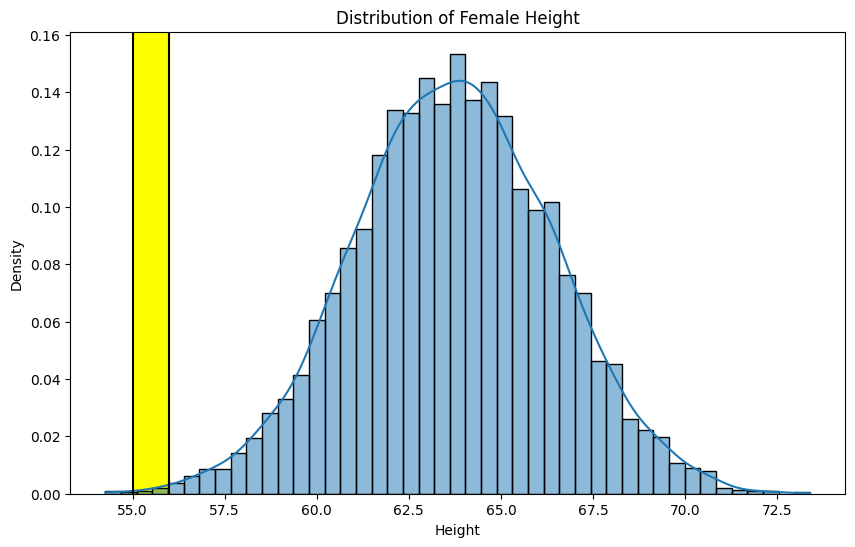

In [14]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

In [15]:
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

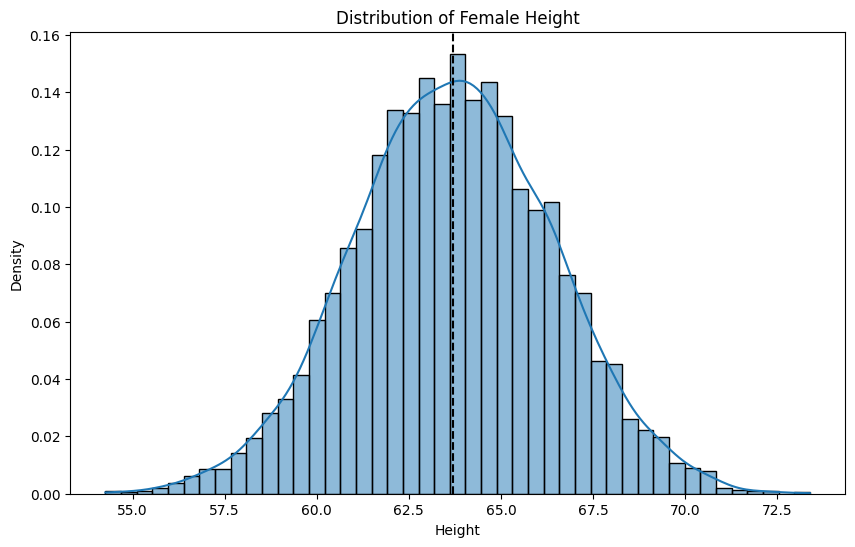

In [16]:
# Cumulative = False
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=False)
ax.set_title('Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');

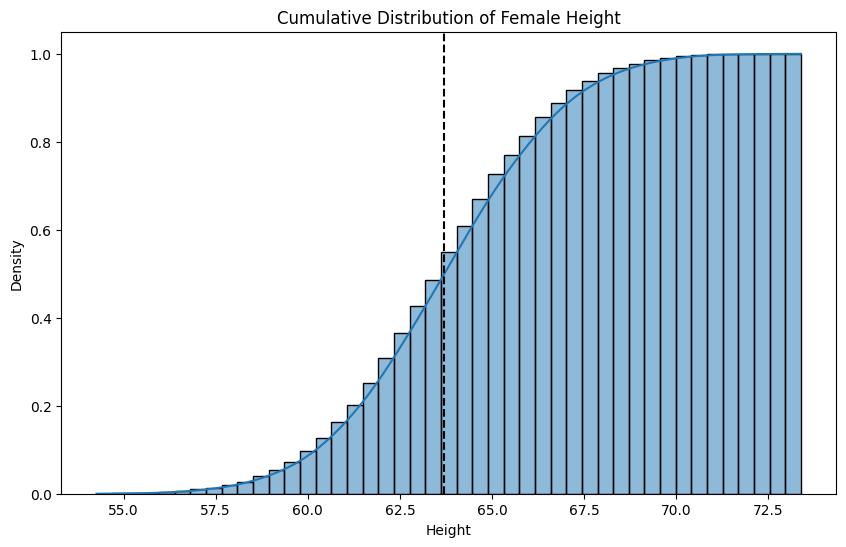

In [17]:
# Cumulative = True
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=True)
ax.set_title('Cumulative Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');

## Making the normal pdf and cdf

In [18]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)

In [19]:
# Note that we had previously defined mean and standard deviation.
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)

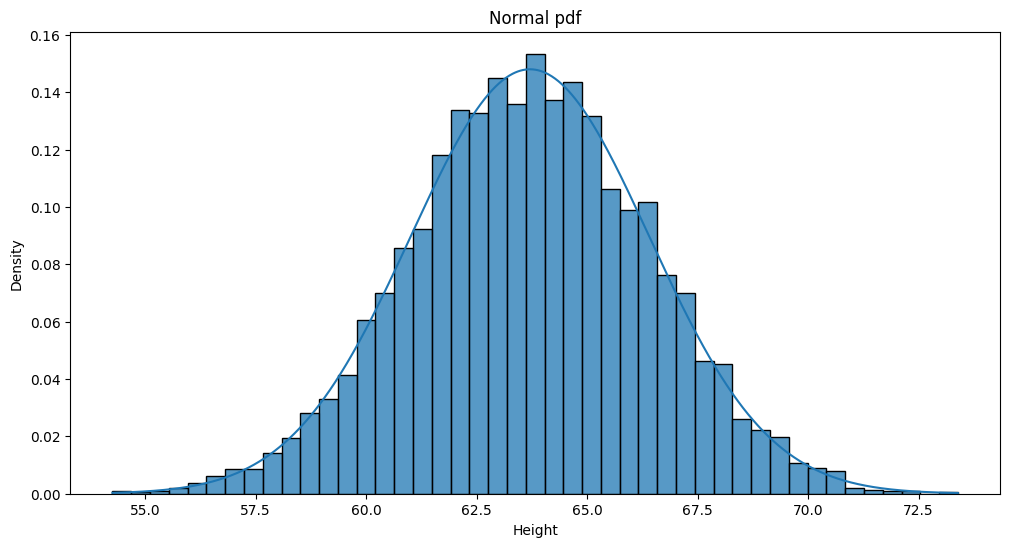

In [20]:
# Plot our data with the normal pdf
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density')
ax.plot(x_range,pdf)
ax.set_title('Normal pdf');

In [22]:
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

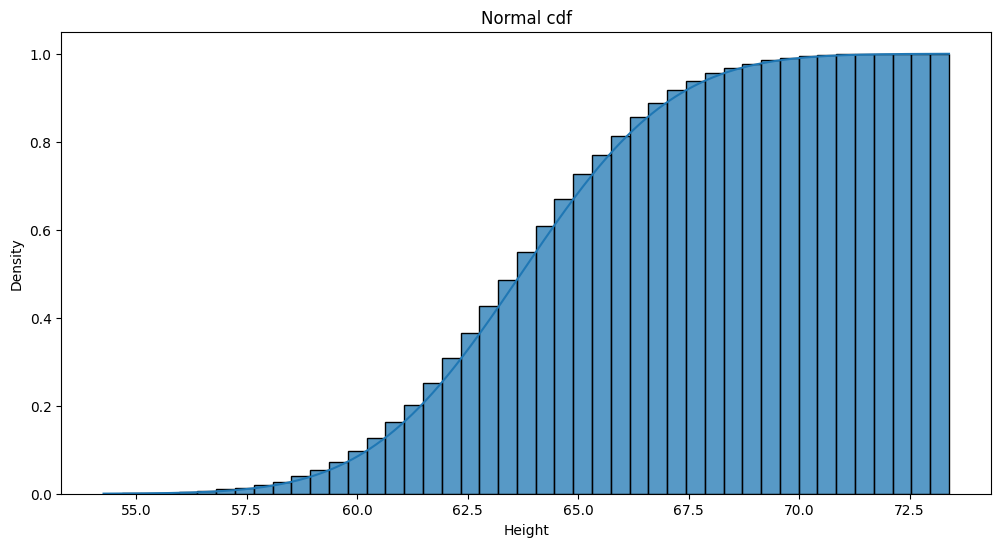

In [23]:
# Let's plot the normal cdf.
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.set_title('Normal cdf');

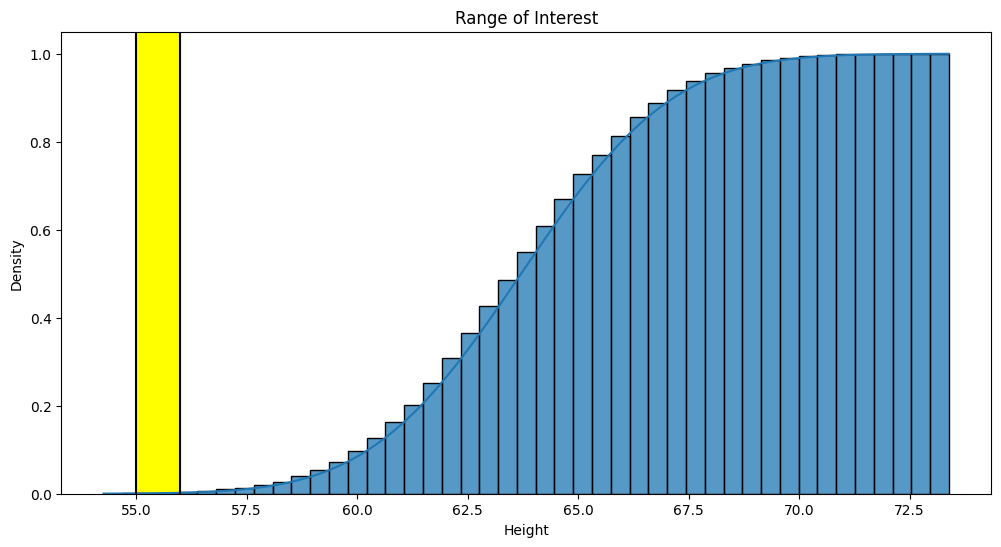

In [24]:
# Now, let's consider the range of values we are interested (female heights between 60 and 77 inches)
# We have previously defined our "low end' and "high end"
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

## 1. between 55.0 and 56.0 inches


In [25]:
# Now that we have explored the concept visually, we just need to do a little subtraction to get the area of our range.
## we subtract to find the probability of a value occurring in the range
stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

0.0015043054289559897

## 2. Is less than 5 feet (60 in)


In [26]:
# Probability of Less than or Greater than a Value
stats.norm.cdf(60, loc=mean,scale=std)

0.08446492725207488

## 3. is greater than the mean (hint: do you know this answer intuitively?)

In [27]:
# Our mean was 60 calculate the probability greater than the mean, we subtract from 1.
1 -stats.norm.cdf(63, loc=mean,scale=std)

0.6036849459973256